In [2]:
#pip install pulsee
import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op # "import *" is bad Python practice, but simplest way to do some math
from operators import CLEAN_1000, CLEAN_0100, CLEAN_0010, CLEAN_0001, RHO_1000, RHO_0100, RHO_0010, RHO_0001, IDENTITY, Ix, Iy, Iz, Sx, Sy, Sz, IxSx, IxSy, IxSz, IySx, IySy, IySz, IzSx, IzSy, IzSz

In [3]:
# Even though in Python, matrix multiplication proceeds left to right. Operator notation is definied such that the right most operator is applied first.
#So this means that the first applied pulse should be all the way on the right.
#Figure
J=7
pi=np.pi

U_0 = op.IDENTITY
U_1 = op.Rx_I(pi/2) * op.U_J(1/(2*J),J) * op.Rx_S(pi/2) * op.Ry_I(pi/2) * op.U_J(1/(2*J),J) * op.Ry_S(pi/2)
U_2 = op.Rx_S(pi/2) * op.U_J(1/(2*J),J) * op.Ry_S(pi/2) * op.Rx_I(pi/2) * op.U_J(1/(2*J),J) * op.Ry_I(pi/2)

In [4]:
#From Sympy-2spin.ipynb

Thermal = qt.Qobj(
[[ 1.49582277e-06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
 [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.49582277e-06]]
, dims=[[2, 2], [2, 2]])

In [5]:
#flip to 10 as in paper
#Thermal_10=op.Rz_I(pi)*Thermal*op.Rz_I(pi).dag()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.49582277e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.49582277e-06]]

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.


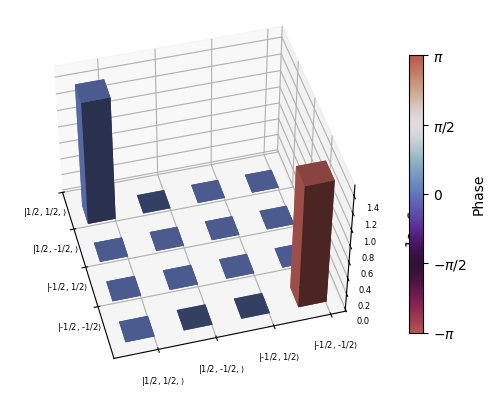

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [6]:
rho_0= U_0 * Thermal * U_0.dag()
display(rho_0)
psplt.plot_complex_density_matrix(rho_0)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.49582277e-06  3.43941585e-23  0.00000000e+00  0.00000000e+00]
 [ 3.43941585e-23 -9.86883726e-38  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.49582277e-06 -3.43941585e-23]
 [ 0.00000000e+00  0.00000000e+00 -3.43941585e-23 -4.22296110e-41]]

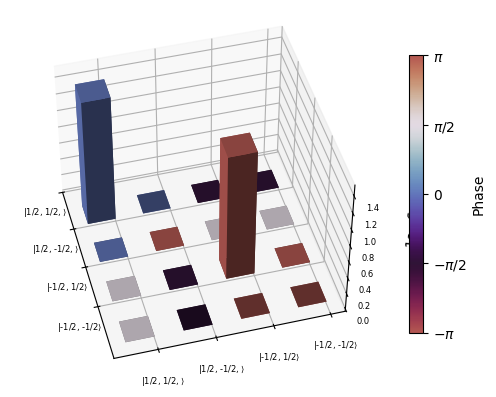

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [7]:
rho_1= U_1 * Thermal * U_1.dag()
display(rho_1)
psplt.plot_complex_density_matrix(rho_1)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.49582277e-06  0.00000000e+00 -3.52931960e-38  0.00000000e+00]
 [ 0.00000000e+00 -1.49582277e-06  0.00000000e+00 -5.25391375e-38]
 [-3.52931960e-38  0.00000000e+00 -9.94792138e-38  0.00000000e+00]
 [ 0.00000000e+00 -5.25391375e-38  0.00000000e+00  7.48611500e-40]]

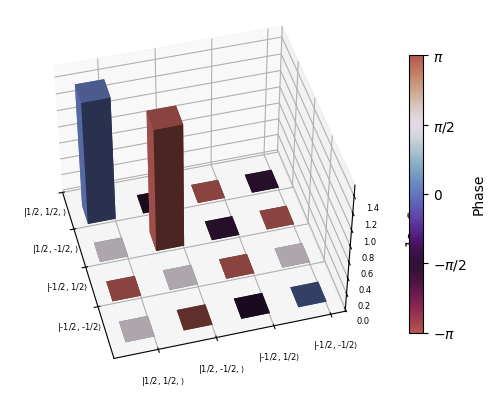

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [8]:
rho_2= U_2 * Thermal * U_2.dag()
display(rho_2)
psplt.plot_complex_density_matrix(rho_2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 4.48746831e-06  3.43941585e-23 -3.52931960e-38  0.00000000e+00]
 [ 3.43941585e-23 -1.49582277e-06  0.00000000e+00 -5.25391375e-38]
 [-3.52931960e-38  0.00000000e+00 -1.49582277e-06 -3.43941585e-23]
 [ 0.00000000e+00 -5.25391375e-38 -3.43941585e-23 -1.49582277e-06]]

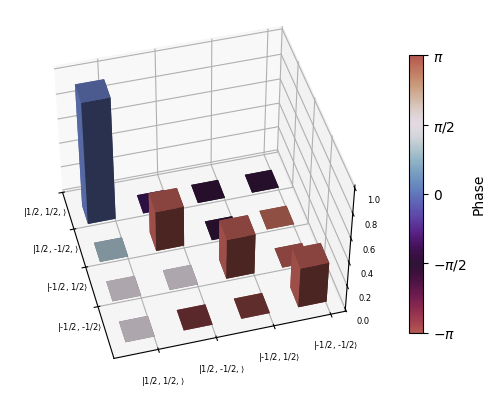

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.00000000e+00  7.66449057e-18 -7.86483460e-33  0.00000000e+00]
 [ 7.66449057e-18 -3.33333333e-01  0.00000000e+00 -1.17079685e-32]
 [-7.86483460e-33  0.00000000e+00 -3.33333333e-01 -7.66449057e-18]
 [ 0.00000000e+00 -1.17079685e-32 -7.66449057e-18 -3.33333333e-01]]


In [9]:
pseudo_pure=rho_0+rho_1+rho_2
display(pseudo_pure)
psplt.plot_complex_density_matrix(pseudo_pure/pseudo_pure[0,0])
print(pseudo_pure/pseudo_pure[0,0])

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 4.48746831e-06  3.43941585e-23 -3.52931960e-38  0.00000000e+00]
 [ 3.43941585e-23 -1.49582277e-06  0.00000000e+00 -5.25391375e-38]
 [-3.52931960e-38  0.00000000e+00 -1.49582277e-06 -3.43941585e-23]
 [ 0.00000000e+00 -5.25391375e-38 -3.43941585e-23 -1.49582277e-06]]

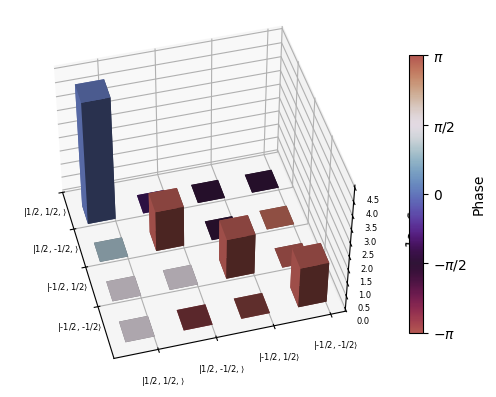

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 4.48746831e-06  3.43941585e-23 -3.52931960e-38  0.00000000e+00]
 [ 3.43941585e-23 -1.49582277e-06  0.00000000e+00 -5.25391375e-38]
 [-3.52931960e-38  0.00000000e+00 -1.49582277e-06 -3.43941585e-23]
 [ 0.00000000e+00 -5.25391375e-38 -3.43941585e-23 -1.49582277e-06]]


In [10]:
pseudo_pure=rho_0+rho_1+rho_2
display(pseudo_pure)
psplt.plot_complex_density_matrix(pseudo_pure)
print(pseudo_pure)

In [18]:
op.Rx_I(pi/2)*op.Ry_I(pi/2)*op.Rx_I(-pi/2)*op.Rx_S(pi/2)*op.Ry_S(-pi/2)*op.Rx_S(-pi/2)*op.Rx_S(pi/2)*op.U_J(1/(2*J),J)*op.Ry_S(pi/2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 7.07106781e-01-7.07106781e-01j  1.43539982e-16+1.01498095e-16j
  -8.71576399e-33-4.52685577e-32j  2.61472920e-32+1.66533454e-16j]
 [ 0.00000000e+00+8.52392549e-17j  7.07106781e-01-7.07106781e-01j
  -2.61472920e-32+1.66533454e-16j -2.61472920e-32+1.78565892e-32j]
 [ 1.66533454e-16-2.61472920e-32j -6.79531408e-33+8.71576399e-33j
  -6.73463194e-18+2.28779237e-16j  7.07106781e-01-7.07106781e-01j]
 [-2.06166544e-32+2.61472920e-32j  1.66533454e-16+2.61472920e-32j
   7.07106781e-01-7.07106781e-01j  2.38303445e-16-4.87765193e-17j]]

In [16]:
(1-1j)/np.sqrt(2)

(0.7071067811865475-0.7071067811865475j)